# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model
from sklearn.ensemble import AdaBoostClassifier # Adabtive Boost Model
from sklearn.model_selection import train_test_split # Splitting into train and test
from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score
from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx


# Read the dataset as csv file and get a glance on it

In [ ]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
Data = pd.read_csv('Dataset/cardio_train.csv', delimiter = ';', na_values = missing_values)
print('There are Total {} datapoints in the dataset. \n with {} Features listed as {}'
.format(Data.shape[0], Data.shape[1], Data.columns.values))

There are Total 70000 datapoints in the dataset. 
 with 13 Features listed as ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']


In [ ]:
Data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Explenation about the dataset and its features
Data description

There are 3 types of input features:

Objective: factual information;

Examination: results of medical examination;

Subjective: information given by the patient.

Features:

1.Age | Objective Feature | age | int (days)

2.Height | Objective Feature | height | int (cm) |

3.Weight | Objective Feature | weight | float (kg) |

4.Gender | Objective Feature | gender | categorical code |

5.Systolic blood pressure | Examination Feature | ap_hi | int |==>( Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below)

6.Diastolic blood pressure | Examination Feature | ap_lo | int |==>(Pressure exerted when Blood exerts between arteries and         heartbeats. Normal Value :   80mmhg or Below)

7.Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |==>(Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High)

8.Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9.Smoking | Subjective Feature | smoke | binary |==>( {0 : 'Not a Smoker', 1 : 'Smoker'} )

10.Alcohol intake | Subjective Feature | alco | binary |==>( {0 : 'Not a Alchoalic', 1 : 'Alchoalic'} )

11.Physical activity | Subjective Feature | active | binary |==>( {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'} )

12.Presence or absence of cardiovascular disease | Target Variable | cardio | binary ==>(It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e. {0 : 'Not Have CVD', 1 : 'Have CVD'})


# Data Analysis

Missing values

In [ ]:
features_with_null = [features for feature in Data.columns if Data[feature].isnull().sum()]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


Information about dataset

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
Data.drop(columns=['id'], inplace=True)

duplicate rows

In [ ]:
duplicate_sum = Data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


Duplicate Rows doesn't contribue to our prediction. Rather they just increase the training size. It's usual to get rid of duplicates from our dataset

In [ ]:
Data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(Data.shape[0], Data.shape[1]))

Total 69976 datapoints remaining with 12 features


# Feature Engineering

In [ ]:
#we hava the feature age in days we will convert it to years by divide on 365
Data['age']= Data['age']/365
Data['age']= Data['age'].astype(int)

# We will create new feature from two feature we have it [height  , weight]

We all whenever we have height and weight, we can calculate BMI. It seems better to get another Feature BMI. Who knows we may get some better insights

In [ ]:
Data['BMI'] = Data['weight']/(np.power(Data['height']/100, 2))
Data['BMI'] = Data['BMI'].astype(int)

Similarly There's a relation bewteen Systolic Diastolic blood pressure that derives  pulse pressure
(معدل ضغط النبض (علاقة بين ضغط الدم الإنقباضي و ضغط الدم الإنبساطي))

In [ ]:
def pulse(Data):
    return np.subtract(Data['ap_hi'], Data['ap_lo'])

Data['pulse'] = Data.apply(pulse, axis=1)

In [ ]:
Data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21,30.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34,50.0
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23,60.0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28,50.0
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23,40.0


# Detect outliers

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

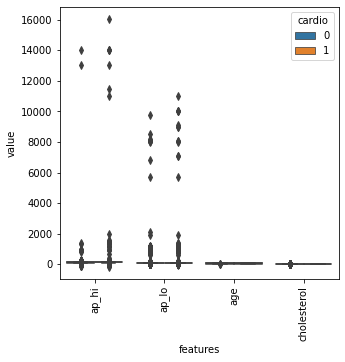

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Data_melt = pd.melt(frame= Data, id_vars='cardio',
                  value_vars=[ 'ap_hi' , 'ap_lo' ,'age','cholesterol'],
                  var_name='features',
                  value_name='value',
                  col_level=None)
# Box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='features', y='value', hue='cardio', data=Data_melt)
plt.xticks(rotation=90)

We note that ap_hi and ap_lo have a outliers but the BMI and age aren't have an outliers

# Remove outliers

we will use IQR(Interquartile Range) to remove the outliers points form dataset

In [ ]:
Data.shape

(69976, 14)

In [ ]:
feature_list = ['ap_hi', 'ap_lo','cholesterol', ]
df_ap = pd.DataFrame(index=['lower_bound', 'upper_bound'])

for i in feature_list:
    Q1 = Data[i].quantile(0.25)
    Q3 = Data[i].quantile(0.75)
    IQR = Q3 - Q1

    lowr_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df_ap[i] = [lowr_bound, upper_bound]

df_ap.head()

,ap_hi,ap_lo,cholesterol
lower_bound,90.0,65.0,-0.5
upper_bound,170.0,105.0,3.5


In [ ]:
#remove the outliers
outlier_filter = ((Data["ap_hi"]>170) |(Data["ap_hi"]<90)| (Data["ap_lo"]>105)|(Data["ap_lo"]< 65) |(Data["cholesterol"]> 3.5)|(Data["cholesterol"]< -0.5) )
Data = Data[~outlier_filter]
Data.shape

(64478, 14)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

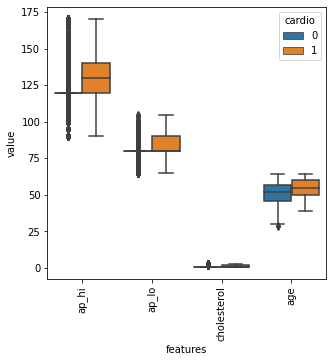

In [ ]:
Data_melt = pd.melt(frame= Data, id_vars='cardio',
                  value_vars=[ 'ap_hi' , 'ap_lo' , 'cholesterol','age'],
                  var_name='features',
                  value_name='value',
                  col_level=None)
# Box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='features', y='value', hue='cardio', data=Data_melt)
plt.xticks(rotation=90)

In [ ]:
data=Data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','BMI','pulse','cardio']]

# Data standarization

In [ ]:
std_list = ["age" ,"BMI","ap_hi", "ap_lo","gender","height","weight","cholesterol","gluc","pulse"]

def standartization(x):
    x_std = x.copy(deep=True)
    for column in std_list:
        x_std[column] = (x_std[column] - x_std[column].mean()) / x_std[column].std()
    return x_std

data= standartization(data)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,pulse,cardio
0,-0.430641,1.356848,0.434714,-0.867153,-1.155664,-0.232064,-0.535581,-0.394124,0,0,1,-1.008088,-1.416735,0
1,0.310770,-0.736991,-1.037783,0.759008,0.929608,1.064198,2.404041,-0.394124,0,0,1,1.156941,0.493147,1
2,-0.282359,-0.736991,0.066589,-0.725748,0.234517,-1.528326,2.404041,-0.394124,0,0,0,-0.675006,1.448088,1
3,-0.727205,1.356848,0.557422,0.546900,1.624698,2.360460,-0.535581,-0.394124,0,0,1,0.157697,0.493147,1
5,1.052181,-0.736991,-1.651323,-0.513640,-0.460573,-0.232064,0.934230,1.351829,0,0,0,0.324237,-0.461794,0


# Feature selection
   Now we have some new feature, let's build up a heat map to get to know about correlation between variables

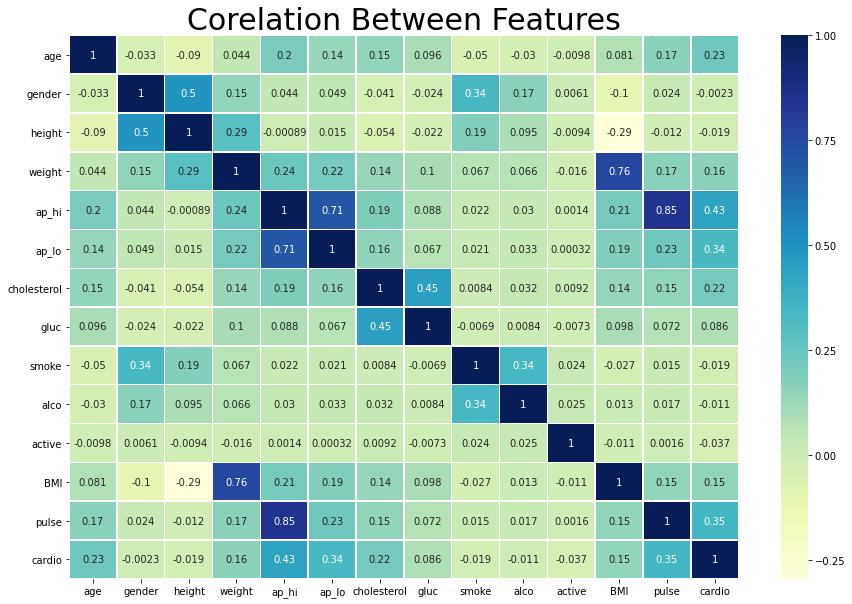

In [ ]:

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

From the above figure we find that the most features correlation with the target_value(cardio) are :
[age , ap_hi , ap_lo ,cholesterol]
and we find that the new feature (BMI) isn't useful becasue not correlation with the target_value therefore we will drop it.
and we will drop every feather which not has a power correlation with target value .

In [ ]:
data.drop(['BMI', 'weight','height', 'gluc', 'gender', 'smoke', 'alco', 'active'], axis =1,inplace=True)

In [ ]:
X = data.iloc[:, :-1]
X.head()

,age,ap_hi,ap_lo,cholesterol,pulse
0,-0.430641,-1.155664,-0.232064,-0.535581,-1.416735
1,0.310770,0.929608,1.064198,2.404041,0.493147
2,-0.282359,0.234517,-1.528326,2.404041,1.448088
3,-0.727205,1.624698,2.360460,-0.535581,0.493147
5,1.052181,-0.460573,-0.232064,0.934230,-0.461794


In [ ]:
X.shape

(64478, 5)

In [ ]:
y = data.iloc[: ,-1]
y.head()

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

# Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,)

In [ ]:
print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(51582, 5).
training label shape is :(51582,).
testing data shape is :(12896, 5).
testing label shape is :(12896,).


# KNN
Datapoint is classified by a plurality vote of its neighbors

In [ ]:
params = {'n_neighbors':list(range(1, 51)),
          'weights':['uniform', 'distance'],
          'p':[1,2]}

# Grid Search
we will apply grid search to get the best Hyper Parameters for every model

In [ ]:
knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid=params, cv=10)
knn_grid_cv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",knn_grid_cv.best_params_)
#print("Best Hyper Parameters: {'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}")

Best Hyper Parameters:
 {'n_neighbors': 46, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=46, p=2, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=46, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

# Random Forest

In [ ]:
params = {
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini']
}

# Grid Search
n_estimators :> No of Decision Trees to be used

max_depth :> Depth of Each Tree

criterion :> Measure the quality of a split

In [ ]:
rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [ ]:
rfc = RandomForestClassifier(random_state=42, n_estimators=200, max_depth= 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Logistic Regression


In [ ]:
params_for_l1 = {
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['liblinear', 'saga']
}

params_for_l2 = {
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Grid Search
C :> Defines Strength of regularization ( smaller values specify stronger regularization )

penalty :> Used to specify the norm used in the penalization

solver :> Algorithm to use in the optimization problem. Different Solver supports different penalty. Hence we cane 3 cases here


In [ ]:
logreg_with_l1_gridcv = LogisticRegression(penalty = 'l1')
logreg_with_l1_gridcv = GridSearchCV(estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv= 10, n_jobs = -1)
logreg_with_l1_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l1_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 2.7825594022071245, 'solver': 'liblinear'}


In [ ]:
logreg_with_l1 = LogisticRegression(penalty = 'l1', C = 2.7825594022071245, solver = 'liblinear')
logreg_with_l1.fit(X_train, y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg_with_l1.predict(X_test)

Here grid search for params_for_l2

In [ ]:
logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2')
logreg_with_l2_gridcv = GridSearchCV(estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv= 10, n_jobs = -1)
logreg_with_l2_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l2_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'solver': 'newton-cg'}


C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
logreg_with_l2 = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'newton-cg')
logreg_with_l2.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg_with_l2.predict(X_test)

# AdaBoost

In [ ]:
params = {'n_estimators':[100,200,300]}

# Grid Search
 n-estimators : number of base estimators or decision trees.

In [ ]:
boost_gridcv =  AdaBoostClassifier(random_state = 42)
boost_gridcv = GridSearchCV(estimator=boost_gridcv, param_grid=params, cv= 10, n_jobs = -1)
boost_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",boost_gridcv.best_params_)

Best Hyper Parameters:
 {'n_estimators': 200}


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=200,)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [ ]:
Y_pred = adaboost.predict(X_test)

# Model Evaluation
evaluate to find the best model for our use-case


Here We will use :

cross_val_score : Evaluate a Score by Cross-Validation.

classification_report : Text Report showing the Main Classification Metrics.

We'll gonna draw Confussion Matrix too.


# Evaluation for KNN

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10)

In [ ]:
Y_pred = knn.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6562
           1       0.74      0.66      0.70      6334

    accuracy                           0.72     12896
   macro avg       0.72      0.72      0.72     12896
weighted avg       0.72      0.72      0.72     12896



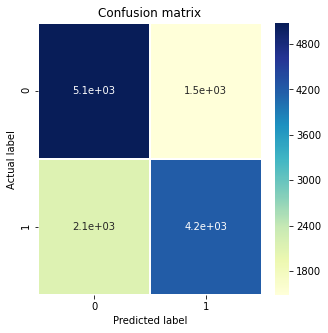

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

True Positive(TP) : Number of Cases Predicted with CVD and Actually had CVD.

True Negative(TN) : Number of Cases Predicted with No CVD and Actually had No CVD.

False Positive(FP) : Number of Cases Predicted with CVD and Actually had No CVD.

False Negative(FN) : Number of Cases Predicted with No CVD and Actually had CVD

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][0]))

True Positive Cases : 4207
True Negative Cases : 5077
False Positive Cases : 1485
False Negative Cases : 2127


# Evaluation for Random Forest

In [ ]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)

In [ ]:
Y_pred = rfc.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6562
           1       0.74      0.68      0.71      6334

    accuracy                           0.73     12896
   macro avg       0.73      0.72      0.72     12896
weighted avg       0.73      0.73      0.73     12896



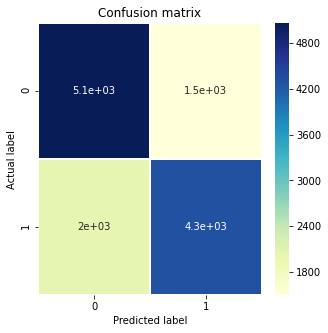

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][0]))

True Positive Cases : 4299
True Negative Cases : 5061
False Positive Cases : 1501
False Negative Cases : 2035


# Evaluation for Logistic Model with L1 Penalty


In [ ]:
scores = cross_val_score(logreg_with_l1, X_train, y_train, cv=10)

In [ ]:
Y_pred = logreg_with_l1.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6562
           1       0.74      0.66      0.70      6334

    accuracy                           0.72     12896
   macro avg       0.72      0.72      0.72     12896
weighted avg       0.72      0.72      0.72     12896



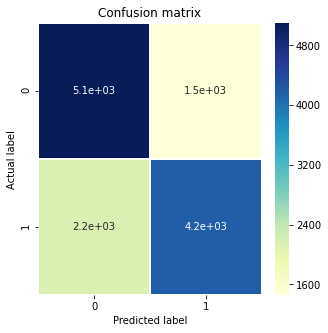

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][0]))

True Positive Cases : 4184
True Negative Cases : 5100
False Positive Cases : 1462
False Negative Cases : 2150


# Evaluation for Logistic Model with L2 Penalty

In [ ]:
scores = cross_val_score(logreg_with_l2, X_train, y_train, cv=10)

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
Y_pred = logreg_with_l2.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6562
           1       0.74      0.66      0.70      6334

    accuracy                           0.72     12896
   macro avg       0.72      0.72      0.72     12896
weighted avg       0.72      0.72      0.72     12896



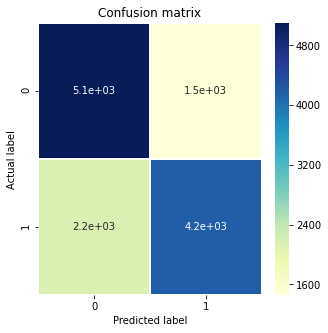

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][0]))

True Positive Cases : 4184
True Negative Cases : 5100
False Positive Cases : 1462
False Negative Cases : 2150


# Evalution for Adaboost

In [ ]:
scores = cross_val_score(adaboost, X_train, y_train, cv=10)

In [ ]:
Y_pred = adaboost.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6562
           1       0.75      0.65      0.70      6334

    accuracy                           0.72     12896
   macro avg       0.73      0.72      0.72     12896
weighted avg       0.73      0.72      0.72     12896



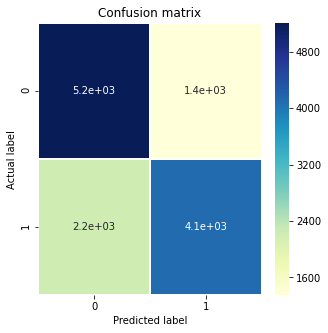

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_pred)[1][0]))

True Positive Cases : 4118
True Negative Cases : 5208
False Positive Cases : 1354
False Negative Cases : 2216
